In [9]:
# regression_anomaly_detection.py

# Importing necessary libraries for regression and anomaly detection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [10]:
# Load the preprocessed data
filepath = 'datasets/updated_real_estate_data_condos_only.csv' 
data = pd.read_csv(filepath)

In [11]:
data = data.dropna()

In [12]:
# Identify numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

X = data[[
    'Full Address', 
    'Project Name', 
    # 'Primary Photo', 
    # 'First Two Photos', 
    # 'Floor Plan', 
    'Property Type', 
    'For Sale or For Rent', 
    # 'Asking Price (PHP)',
    # 'Rent Price (PHP)', 
    # 'Price per Sqm (PHP)', 
    # 'Down payment Php', 
    'Down payment %', 
    'Advanced Payment (months)', 
    'Security Deposit (months)', 
    'Minimum Rent duration (months)', 
    'Generic Address', 
    # 'Approximated GPS Pin', 
    'Size (sqm)', 
    'Property Specifications', 
    # 'Property Features', 
    'Property Category', 
    'Created / Updated Date', 
    # 'Full Description', 
    'Developer', 
    'Verified Status', 
    # 'Badges', 
    # 'More Photos', 
    # 'Video Tour', 
    'Related Project', 
    # 'Broker', 
    'Nearness to landmarks/key locations', 
    'Similar Properties', 
    'Commission PHP', 
    'Commission %', 
    'Price vs Zonal Value'
]] 

y = data['Asking Price (PHP)']  # Target variable



In [13]:
# Identify numerical and non-numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
non_numerical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Label encode the non-numeric features
label_encoder = LabelEncoder()

# Apply label encoding to non-numerical columns
for column in non_numerical_columns:
    if column in X.columns:  # Check if the column exists in the feature set
        X[column] = label_encoder.fit_transform(X[column])


C:\Users\fabia\AppData\Local\Temp\ipykernel_11432\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\fabia\AppData\Local\Temp\ipykernel_11432\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\fabia\AppData\Local\Temp\ipykernel_11432\1518733174.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape

((412, 21), (103, 21))

### Linear Regression

In [15]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Assuming X and y are already prepared

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Test evaluation metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print evaluation metrics for train and test sets
print("Train Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")
print(f"MAPE: {train_mape}")

print("\nTest Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")
print(f"MAPE: {test_mape}")


Train Metrics:
MAE: 4559.061088684219
MSE: 48453612.013832174
RMSE: 6960.862878539712
R²: 0.99999935795071
MAPE: 0.0002642956194840192

Test Metrics:
MAE: 4609.042199312356
MSE: 51239438.5853241
RMSE: 7158.17285243407
R²: 0.9999993937032737
MAPE: 0.0002626917565975576


In [17]:
# Sample data: predicted and actual prices
predicted_prices = model.predict(X_test)  # Get the predicted prices from the model
actual_prices = y_test  # Actual prices from the test set

# Create a DataFrame to compare predicted vs actual prices
comparison_df = pd.DataFrame({
    'Predicted Price': predicted_prices,
    'Actual Price': actual_prices
})

# Optionally, calculate the error (difference between predicted and actual prices)
comparison_df['Error'] = comparison_df['Predicted Price'] - comparison_df['Actual Price']

# Print the first few rows of the comparison
print(comparison_df.head())

# Optionally, save it to a CSV for further analysis
comparison_df.to_csv('predicted_vs_actual_prices.csv', index=False)


     Predicted Price  Actual Price         Error
304     3.518385e+07      35183609    240.078131
499     1.140626e+07      11404743   1515.011923
441     1.807976e+07      18093091 -13330.871922
153     1.809433e+07      18093091   1238.607094
501     3.658316e+07      36582077   1084.996900


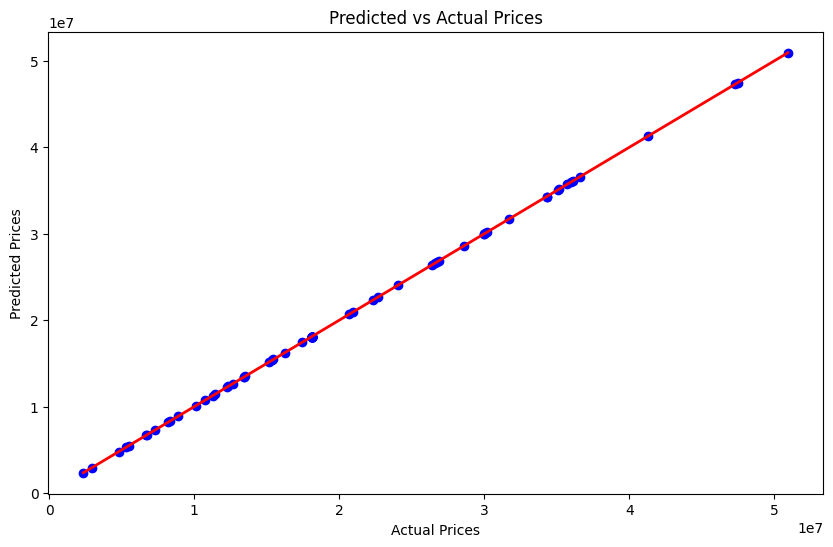

In [18]:
# Visualizing the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


In [19]:
# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)

# Marking anomalies as -1 and normal points as 1
data['anomaly'] = outliers

# Display rows with anomalies
anomalies = data[data['anomaly'] == -1]
anomalies.head()


,Full Address,Project Name,Primary Photo,First Two Photos,Floor Plan,Property Type,For Sale or For Rent,Asking Price (PHP),Rent Price (PHP),Price per Sqm (PHP),...,Video Tour,Related Project,Broker,Nearness to landmarks/key locations,Similar Properties,Commission PHP,Commission %,Price vs Zonal Value,Realistic Asking Price (PHP),anomaly
9,"173 Sabrina Parks\nRossland, PA 47216",Avida Towers,help.jpeg,"half.jpeg,practice.jpeg",performance.mp3.pdf,Condominium,For Rent,18093091,15460,72147,...,record.webm,Fame Residences,Diana Daniels,5 mins to Megamall,Makati Prime Tower,309.20,2,Above,"33,728,000 - 50,592,000 PHP",-1
69,"36407 Miller Coves\nOscarshire, NH 65803",The Grove by Rockwell,positive.jpg,"to.bmp,person.gif",form.odt.pdf,Condominium,For Rent,18093091,84626,84382,...,like.mov,Air Residences,Paula Brooks,8 mins to Festival Mall,Village A,1692.52,2,Below,"3,744,000 - 5,616,000 PHP",-1
93,"75943 Christopher Rue Apt. 966\nNorth Amanda, ...",Avida Towers,color.png,"medical.gif,part.png",production.css.pdf,Condominium,For Rent,18093091,54911,178351,...,add.mov,Avida Towers,Robert Taylor,7 mins to Festival Mall,Tower 1,1098.22,2,Above,"12,648,000 - 18,972,000 PHP",-1
114,"72696 Oconnell Shoal Suite 498\nBrownchester, ...",Shore Residences,choice.jpg,"figure.jpeg,someone.bmp",parent.mp3.pdf,Condominium,For Rent,18093091,56833,57921,...,myself.mp4,Avida Towers,Sara Williams,20 mins to UP Diliman,Village A,1136.66,2,Above,"2,496,000 - 3,744,000 PHP",-1
119,"PSC 7562, Box 3574\nAPO AP 78532",The Grove by Rockwell,community.jpeg,"kid.jpg,measure.jpg",upon.tiff.pdf,Condominium,For Sale,52408799,55638,199273,...,best.mp4,Air Residences,Allison Deleon,15 mins to Megamall,Residences B,2620439.95,5,Below,"25,248,000 - 37,872,000 PHP",-1


In [20]:
# Visualizing anomalies in the price vs square footage scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['square_footage'], y=data['price'], hue=data['anomaly'], palette='coolwarm', legend=False)
plt.title('Price vs Square Footage with Anomalies')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()


KeyError: 'square_footage'

<Figure size 1000x600 with 0 Axes>